In [70]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import polars as pl
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
plt.rcParams["font.size"] = 15


In [2]:
def select_cols_(i: int) -> list[pl.Expr]:
    return list(map(lambda i: pl.col(f"column_{i}"), range(i)))


In [4]:
data_path = Path("/home/shinsei/MyResearches/feat_extrc/reports/features/SimpleCAE32/2023-07-10/13-09-32/feature_train_data_clustering.csv")
df = pl.read_csv(data_path)
n_lf = 128
X = df.select(select_cols_(n_lf))
sample_nums = df.select(["dirname"]).to_numpy().flatten()
local_structure_clusters = df.select(["cluster"]).to_numpy().flatten()


Text(0, 0.5, 'Cumulative contribution rate')

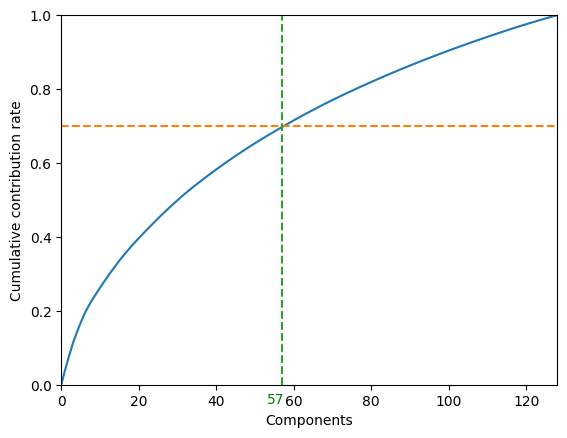

In [50]:
pca = PCA()
X_pca = pca.fit_transform(X)
# 寄与率
contribute_ratio = pca.explained_variance_ratio_
# 累積寄与率
cumsum_contribute_ratio = contribute_ratio.cumsum()
# 次元削減後の成分の数
n_reducted_components = np.count_nonzero(cumsum_contribute_ratio <= 0.7)

# 累積寄与率を表示
plt.plot(range(0, n_lf+1), [0] + cumsum_contribute_ratio.tolist())
plt.plot(range(0, n_lf+1), [0.7] * (n_lf+1), linestyle="--", )
plt.plot([n_reducted_components] * 2, [0, 1],  linestyle="--", )
plt.text(n_reducted_components-4, -0.05, f"{n_reducted_components}", color="g")
plt.xlim(0, n_lf)
plt.ylim(0, 1)
plt.xlabel("Components")
plt.ylabel("Cumulative contribution rate")


In [6]:
tsne = TSNE(
    n_components=2,
    perplexity=30,
    random_state=0
)
X_emb = tsne.fit_transform(X)


In [52]:
tsne_pca = TSNE(
    n_components=2,
    perplexity=30,
    random_state=0
)
X_pca_emb = tsne_pca.fit_transform(X_pca[:, :n_reducted_components])


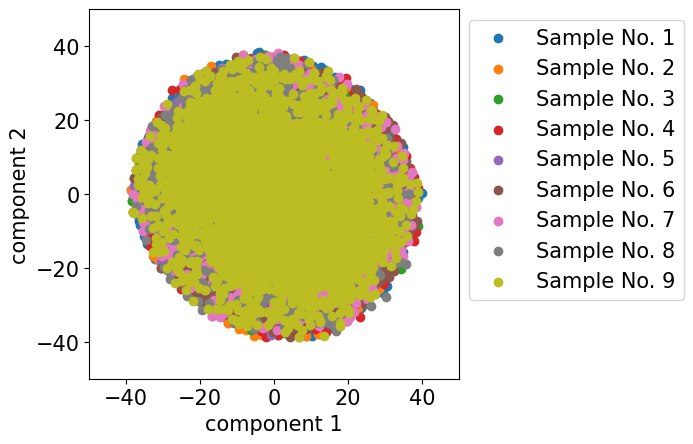

In [74]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for sample_num in np.unique(sample_nums):
    ax.scatter(X_emb[sample_nums==sample_num, 0], X_emb[sample_nums==sample_num, 1], label=f"Sample No. {sample_num+1}")
    # ax.scatter(X_pca_emb[local_structure_clusters==sample_num, 0], X_pca_emb[local_structure_clusters==sample_num, 1], label=sample_num)
ax.legend(bbox_to_anchor=(1,1), loc="upper left")
ax.set_xlim(-50, 50)
ax.set_ylim(-50, 50)
ax.set_xlabel("component 1")
ax.set_ylabel("component 2")
ax.set_aspect("equal")
plt.show()


In [22]:
cmap = plt.get_cmap("tab10")
cmap(1)


(1.0, 0.4980392156862745, 0.054901960784313725, 1.0)

<class 'numpy.ndarray'>
[[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]]


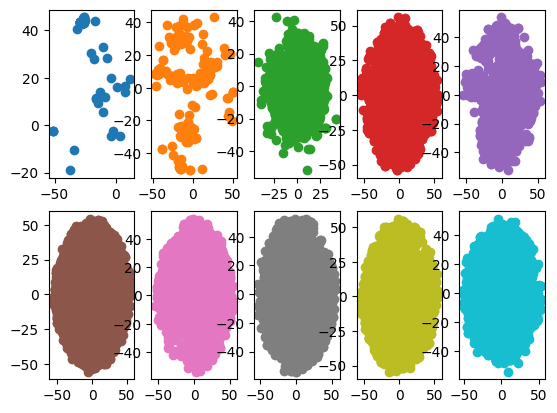

In [54]:
fig = plt.figure()
# axes = fig.add_subplot(2,5,1)
axes = fig.subplots(2,5,)
# axes = fig.subplots(2,5, sharey=True)
print(type(axes))
print(axes)
for cluster in np.unique(local_structure_clusters):
    axes[cluster // 5, cluster % 5].scatter(
        # X_emb[local_structure_clusters==cluster, 0],
        # X_emb[local_structure_clusters==cluster, 1],
        X_pca_emb[local_structure_clusters==cluster, 0],
        X_pca_emb[local_structure_clusters==cluster, 1],
        label=cluster,
        color=cmap(cluster)
    )
ax.legend()
plt.show()


<class 'numpy.ndarray'>
[[<Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: >]]


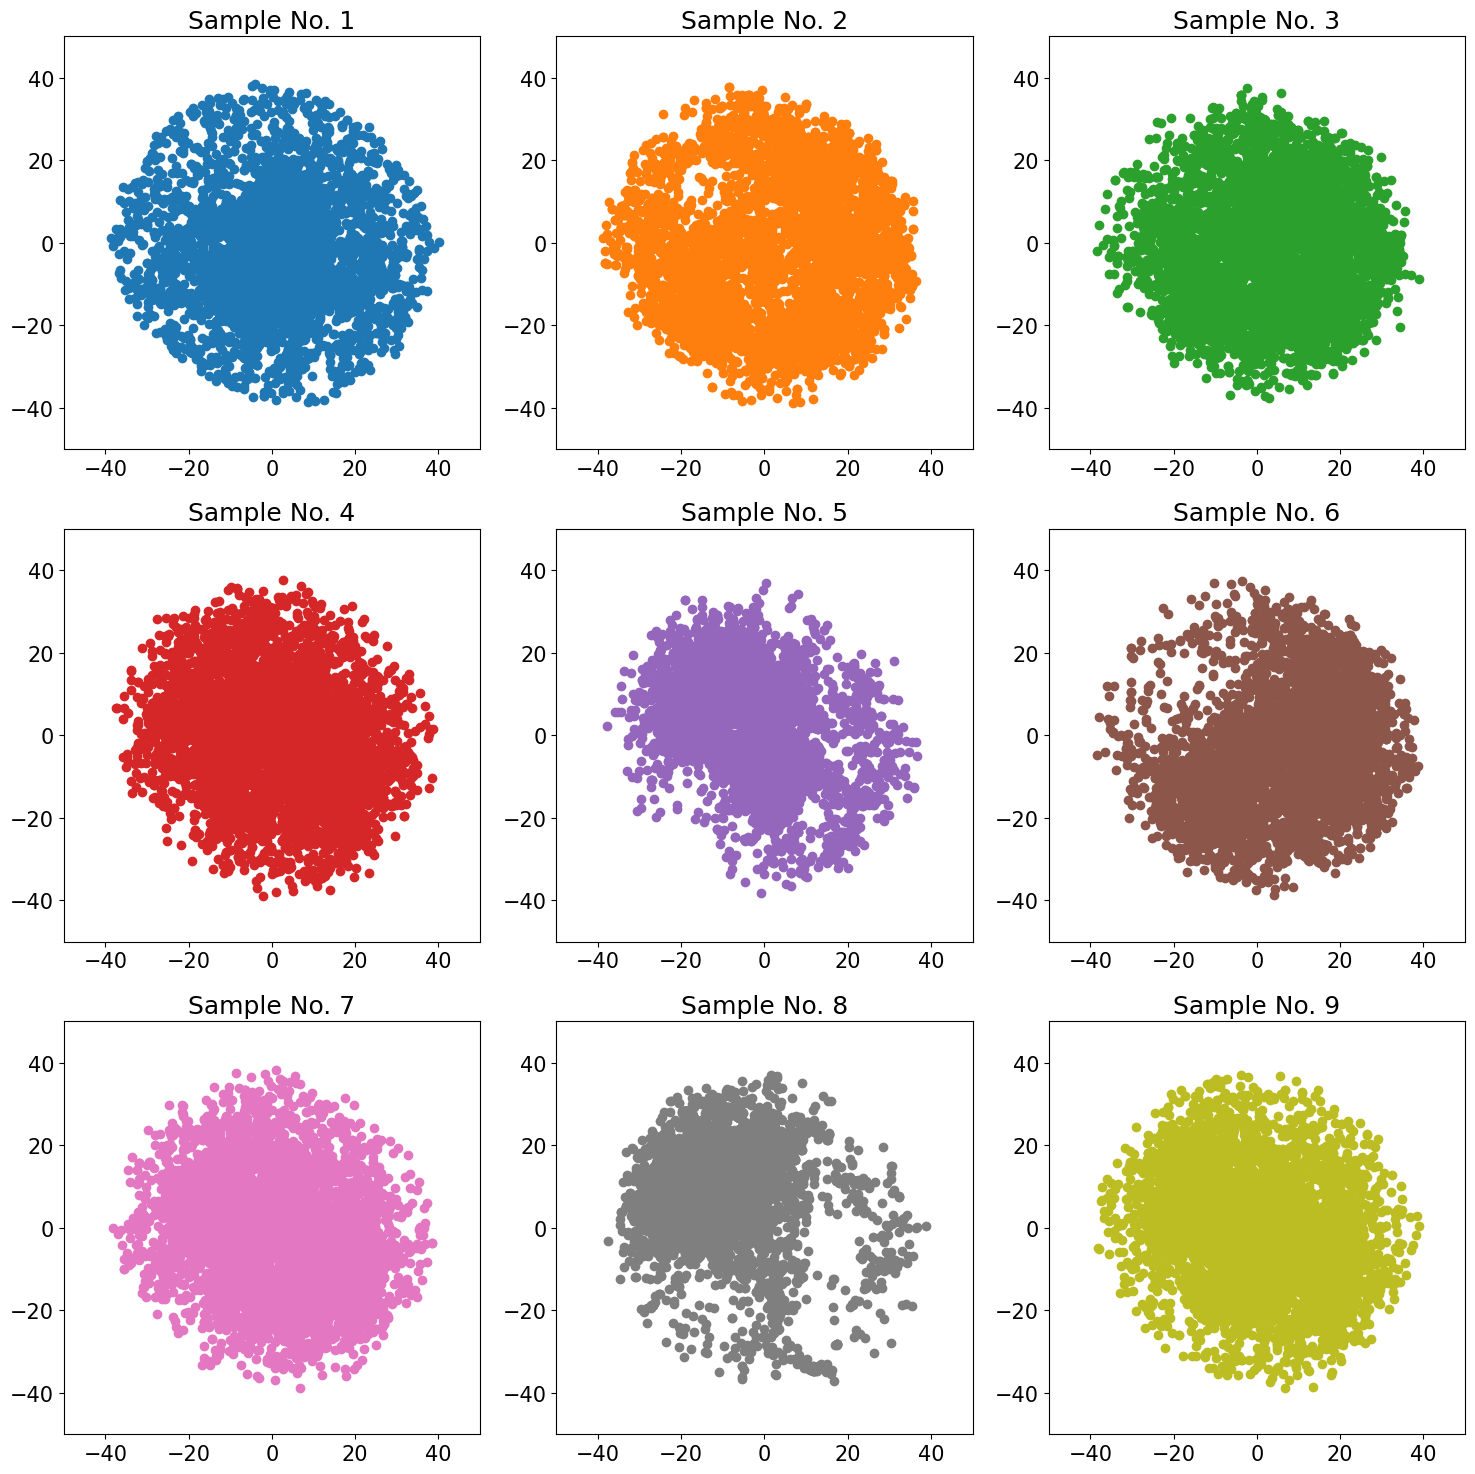

In [75]:
fig = plt.figure(figsize=(15,15))
# axes = fig.add_subplot(2,5,1)
axes = fig.subplots(3,3,)
# axes = fig.subplots(2,5, sharey=True)
print(type(axes))
print(axes)
for sample_num in np.unique(sample_nums):
    axes[sample_num // 3, sample_num % 3].set_title(f"Sample No. {sample_num+1}")
    axes[sample_num // 3, sample_num % 3].scatter(X_emb[sample_nums==sample_num, 0], X_emb[sample_nums==sample_num, 1], label=sample_num, color=cmap(sample_num))
    axes[sample_num // 3, sample_num % 3].set_xlim(-50, 50)
    axes[sample_num // 3, sample_num % 3].set_ylim(-50, 50)
    # ax.legend()

fig.tight_layout()
plt.show()
